# Intro

최근 발달된 딥러닝 기술은 숙련자 수준 이상의 정확도를 바탕으로 영상분석 인력의 개인적 편차, 주관적 판단, 피로에 의한 오진 등의 부정확성을 극복할 수 있는 좋은 대안으로 인정 받고 있다.

하지만, **의료 영상을 분석**하는 것은 일반적인 이미지 처리와는 다른 독특한 특징이 있다.

-  의료 영상 이미지는 개인 정보 보호 등의 이슈로 **데이터 구하는 것이 쉽지 않다**.

-  라벨링 작업 자체가 전문 지식을 요하므로 데이터셋 구축 비용이 비쌈.

- 희귀질병은 데이터 입수 자체가 힘듦

-  **음성/양성 데이터 간 imbalace**가 심하기 때문에 학습에 유의

-  이미지만으로 진단이 어려워 다른 데이터와 결합해서 해석해야 하기도 함.

따라서, 의료 영상 처리를 위해서는 딥러닝 영상처리 기술뿐 아니라, **의료 도메인 지식** 및 의료 영상에 대한 명확한 이해가 필요하다.

# 의료 영상에 대하여

오늘날, **배를 가르지 않고** 폐나 간 등을 보려면 X-RAY 영상을 찍거나 CT 영상을 찍어서 본다.

-  **X-RAY**

   x-ray는 전자를 물체에 충돌시길 때 발생하는 투과력이 강한 복사선(전자기파)를 말한다.

   방사선의 일종으로 지방, 근육, 천, 종이같이 밀도가 낮은 것은 수월하게 통과하지만, 밀도가 높은 뼈, 금속 같은 물질은 잘 통과하지 못함.

   따라서 영상으로 보면, 밀도가 높은 뼈가 선명하게 나타난다.

-  **CT**
   
   computed tomography의 줄임말로, 환자를 중심으로 x-ray를 빠르게 회전하여 3D 이미지를 만들어내는 영상이다.

   환자의 3차원 이미지를 형성하여 기본 구조는 물론 종양 또는 이상을 쉽게 식별하고 위치를 파악할 수 있다.

   신체의 단면 이미지(단층 촬영 이미지)를 'slice'라고 하고, 이런 slice는 기존의 x-ray보다 더 자세한 정보를 포함한다.

-  **MRI**

   magnetic resonance imaging(자기 공명 영상)의 줄임말로 신체의 해부학적 과정과 생리적 과정을 보기 위해 사용하는 의료 영상ㅇ 기술이다.

   mri스캐너는 강한 자기장을 사용하여 신체 기관의 이미지를 생성한다.

   mri는 ct나 x-ray와 다르게 방사선을 사용하지 않아서 방사선의 위험성에서는 보다 안전하다.

# X-RAY

x-ray 이미지를 기반으로 폐렴을 진단하는 딥러닝 모델을 제작하려 한다.

x-ray 이미지를 이해하려면, x-ray 영상을 촬영하기 위해 사용되는 자세 분류 체계를 이해하는 것이 중요하다.



**의료 영상 자세 분류**

의료 영상 촬영은 인체를 세 방향의 단면으로 나누어 진행된다.

-  Sagittal plane: 시상면, 사람을 왼쪽과 오른쪽을 나누는 면

   우리가 영상을 볼 때는 보통 정면을 보고 있는 것으로 가정한다.

   오른쪽 = 실제 사람이 왼쪽을 봐야함.

   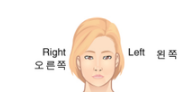

-  Coronal plane: 관상면, 인체를 앞뒤로 나누는 면

-  Transverse plane: 횡단면(수평면), 인체를 상하로 나누는 면

**x-ray 특성**

전자기파가 몸을 통과한 결과를 이미지화 시킨 것으로 색상이 아니라 흑백 명암으로 나오게 된다.

부위에 따라서 명암은 다르게 나온다.

- 뼈: 하얀색

- 근육 및 지방: 연한 회색

- 공기: 검은색

  공기가 가득 찬 폐도 검은색으로 나오게 된다.

# 폐렴을 진단해보자

dataset: 중국 광저우에 있는 광저우 여성 및 어린이 병원의 1~5세 소아 환자의 흉부 x선 영상

**폐렴(pneumonia)이란?**

폐에 염증이 생긴 상태로 중증의 호흡기 감염병.

염증은 유해한 자극에 대한 생체반응 중 하나로 면역세포, 혈관, 염증 매개체들이 관여하는 보호 반응이다.

따라서 폐렴은 폐에서 바이러스나 세균으로부터 몸을 지키기 위해 백혈구들이 싸우고 있는 상황이다.

**폐렴 구별법**

x-ray 사진상, 다양한 양상의 음영(폐 부위에 희미한 그림자) 증가가 관찰되면 폐렴으로 간주한다.

구별 방법은 간단하지만 실제 영상을 보면 희미한 경우가 많아서 파악하기 어렵다.

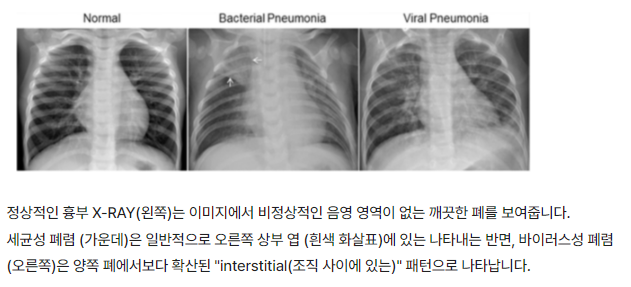

위와 같이 폐렴에 걸린 사진들은 특징이 패턴을 이루고 있는 것을 볼 수 있다.

따라서, 이미지에서 폐렴의 특징 패턴을 학습해서 찾아내게 시키면 될 것이다.



---



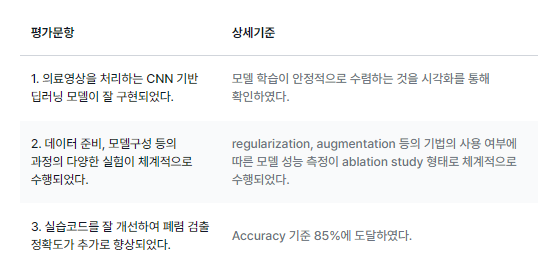

**[평가 기준]**

-  1.Set-up: Batch size, Epoch 변경해보기
-  2.데이터 준비하기: 원본 데이터를 가져와 전처리 및 배치 구성을 진행, augmentation 기법 추가
-  3.데이터 시각화: augmentation이 제대로 처리되었는지 show_batch()함수를 통해 확인
-  4.ResNet-18 구현: residual block 구성(3x3 CNN, batchnormalization), filter개수 조정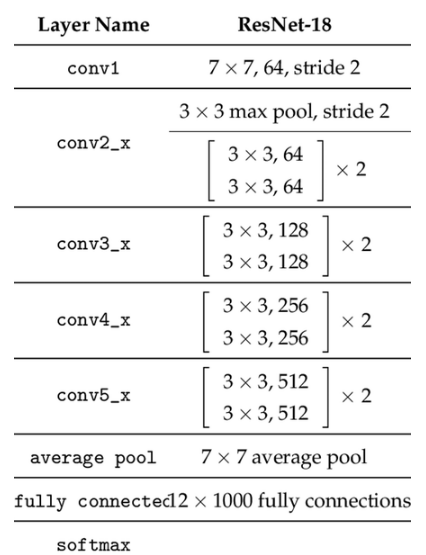
-  5. 데이터 imbalance 처리: imbalance 처리 유무에 따른 결과 차이, recall 강조하기 위해 폐렴 데이터를 잘 맞추도록 더 강화하는 효과 고민
-  6. 모델 훈련: optimizer나 learning rate 바꿔보기
-  7. 결과 확인 및 시각화: 의료 영상 모델의 특성상 recall도 중요. 훈련 과정의 history 그래프를 시각화.


# 1.Set-up



Batch size, epoch 변경

In [1]:
#패키지 임포트
import os, re
import random, math
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#변수 생성

# 데이터 로드할 때 빠르게 로드할 수 있도록하는 설정 변수
AUTOTUNE = tf.data.experimental.AUTOTUNE
# X-RAY 이미지 사이즈 변수
IMAGE_SIZE = [180, 180]

# 데이터 경로 변수
ROOT_PATH = os.path.join(os.getenv('HOME'), 'aiffel')
TRAIN_PATH = ROOT_PATH + '/chest_xray/data/train/*/*' # *은 모든 디렉토리와 파일을 의미합니다.
VAL_PATH = ROOT_PATH + '/chest_xray/data/val/*/*'
TEST_PATH = ROOT_PATH + '/chest_xray/data/test/*/*'

BATCH_SIZE = 16
EPOCHS = 10




---



# 2.데이터 가져오기



데이터를 열어보면 이미 train, validation, test로 나눠져 있다.

In [3]:
#데이터 개수 확인
train_filenames = tf.io.gfile.glob(TRAIN_PATH)
test_filenames = tf.io.gfile.glob(TEST_PATH)
val_filenames = tf.io.gfile.glob(VAL_PATH)

print(len(train_filenames))
print(len(test_filenames))
print(len(val_filenames))

5216
624
16


train: 5216개

test: 624개

val: 16개

개수 비는 89%, 10.7%, 0.3%로 **val 개수가 너무 적기** 때문에 train에서 val에 사용될 데이터를 더 가져와보자.

**train과 val에 있는 데이터를 모은 다음에 train:val을 80:20으로 분할**

In [4]:
# train 데이터와 validation 데이터를 모두 filenames에 담기
filenames = tf.io.gfile.glob(TRAIN_PATH)
filenames.extend(tf.io.gfile.glob(VAL_PATH))

# 모아진 filenames를 8:2로 나누기
train_size = math.floor(len(filenames)*0.8)
random.seed(8)
random.shuffle(filenames)
train_filenames = filenames[:train_size]
val_filenames = filenames[train_size:]

print(len(train_filenames))
print(len(val_filenames))

4185
1047


train: 4185개

test: 624개

val: 1047개

**train 데이터 안에** 정상 이미지 수와 폐렴 이미지 수를 보자.

In [5]:
#train내 정상이미지와 폐렴이미지 각각의 파일 경로
print(f'Normal image path\n{filenames[0]}')
print(f'Pneumonia image path\n{filenames[2000]}')

#파일 경로에 normal이 있는지 혹은 pneumonia가 있는지 확인하면 정상이미지 혹은 폐렴이미지를 셀 수 있음.
COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
print(f"Normal images count in training set: {COUNT_NORMAL}")

COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])
print(f"Pneumonia images count in training set: {COUNT_PNEUMONIA}")

Normal image path
/aiffel/aiffel/chest_xray/data/train/NORMAL/IM-0450-0001.jpeg
Pneumonia image path
/aiffel/aiffel/chest_xray/data/train/PNEUMONIA/person1345_bacteria_3422.jpeg
Normal images count in training set: 1070
Pneumonia images count in training set: 3115


정상보다 폐렴 이미지 수가 3배 많다. (**data imbalance**)

우리가 사용할 CNN 모델의 경우 데이터가 클래스별 balance가 좋을수록 training을 잘한다.

**test와 val 데이터셋**은 평가하기 위해 사용되므로 학습과 관련 없어서 **imbalance해도 문제 없다.**

**tf.data 인스턴스**를 만들어보자.

tf.data 인스턴스는 데이터를 읽고 전처리하는 과정을 정의하는데 필요한 메서드와 기능을 제공한다.

tf.data는 tensorflow에서 학습시킬 때, **mini-batch로 작업**할 수 있도록 해준다.

In [6]:
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

#train dataset과 validation dataset 개수 확인
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print(f"Training images count: {TRAIN_IMG_COUNT}")

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print(f"Validating images count: {VAL_IMG_COUNT}")

Training images count: 4185
Validating images count: 1047


**현재 이미지에는 라벨 데이터가 따로 없다.**

그러나 파일 경로에 normal이나 pneumonia가 포함되어 있기 때문에 이를 이용해서 라벨 데이터를 만들어주는 함수를 만들어보자.

In [7]:
# 파일 경로의 끝에서 두번째 부분을 확인하면 양성과 음성을 구분할 수 있습니다
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "PNEUMONIA"   # 폐렴이면 양성(True), 노말이면 음성(False)

**이미지 데이터는 현실적으로 사이즈가 제각각일 가능성이 높다.**

이미지 사이즈를 통일 시키고 GPU 메모리를 더욱 효율적으로 사용하기 위해 이미지 사이즈를 줄여보자.

decode_img 함수와 porcess_path 함수를 만들어보자.

In [8]:
# 이미지를 알맞은 형식으로 바꿈.
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3) # 이미지를 uint8 tensor로 수정
    img = tf.image.convert_image_dtype(img, tf.float32) # float32 타입으로 수정
    img = tf.image.resize(img, IMAGE_SIZE) # 이미지 사이즈를 IMAGE_SIZE로 수정
    return img

# 이미지 파일의 경로를 입력하면 이미지와 라벨을 읽어온다.
def process_path(file_path):
    label = get_label(file_path) # get_lavel을 이용해 라벨값 가져옴
    img = tf.io.read_file(file_path) # 이미지 읽기
    img = decode_img(img) # 이미지를 알맞은 형식으로 수정
      #decode_img 함수를 이용해서 이미지의 데이터 타입을 float로 바꾸고 사이즈 변경
    return img, label

**train dataset과 validation dataset 만들기**

num_parallel_calls 파라미터 위에서 할당한 AUTOTUNE 변수를 이용하면 더욱 빠르게 데이터를 처리해준다.

In [9]:
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

이미지가 잘 resize되었는지, 그리고 label이 잘 들어가있는지 확인

In [10]:
for image, label in train_ds.take(1):  #train_ds.take(1)은 하나의 데이터만 가져온다는 의미
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  False


**test dataset 만들기**

In [11]:
test_list_ds = tf.data.Dataset.list_files(TEST_PATH)
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

#test dataset 개수 확인
print(TEST_IMAGE_COUNT)

624


Tensorflow에서는 tf.data 파이프라인을 사용해서 학습 데이터를 효율적으로 사용할 수 있도록 해준다.

tf. 파이프라인을 이용하여 prepare_for_training()함수를 정의해서 데이터를 변환시켜주자.

좌우 반전 정도의 augmentation도 추가해주자.

In [67]:
#prepare_for_training 함수를 정의해서 데이터를 변환시켜줌

def augment(image,label):
    image = tf.image.random_flip_left_right(image)  # 랜덤하게 좌우를 반전합니다.
    return image,label

def prepare_for_training(ds, shuffle_buffer_size=1000):
    ds = ds.map(
            augment,       # augment 함수 적용
            num_parallel_calls=2
        )
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
      #shuffle()을 사용하면, 고정 크기 버퍼를 유지하고 해당 버퍼에서 무작위로 균일하게 다음 요소 선택
      #버퍼란, 데이터를 섞기 위해 사용되는 일시적인 저장 공간.
    ds = ds.repeat()
      #epoch를 진행하면서 여러 번 데이터셋을 불러오게 되는데, 이때 repeat()을 사용한 데이터셋의 경우 여러 번 데이터셋을 사용하게 해줘서 자동으로 데이터 맞춰줌
    ds = ds.batch(BATCH_SIZE)
      #batch()를 사용하면 BATCH_SIZE에서 정한 만큼의 batch로 주어진다.
    ds = ds.prefetch(buffer_size=AUTOTUNE)
      #prefetch()를 사용하면, 학습데이터를 나눠서 읽어옴으로, 첫 번째 데이터를 GPU에서 학습하는 동안 두 번째 데이터를 CPU에서 준비할 수 있어 리소스의 유휴 상태를 줄임.
    return ds

train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)



---



# 3.데이터의 시각화

데이터를 보기 위해 train에 있는 batch 중 첫 번째 배치를 추출한다.

추출된 배치는 image와 label 데이터 셋으로 나눈다.

show_batch()함수를 이용해 결과 사진을 보자.

TypeError: Invalid shape (16, 180, 180, 3) for image data

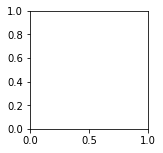

In [68]:
# 이미지 배치를 입력하면 여러장의 이미지를 보여준다.
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(BATCH_SIZE):
        ax = plt.subplot(4,math.ceil(BATCH_SIZE/4),n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")


image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy(), label_batch.numpy())



---



# 4.ResNet 18

residual_block()의 구성
-  2번의 3x3 convolution 진행
-  batch normalization을 통해 gradient vanishing과 gradient exploding 해결

In [62]:
# conv_block 함수.
def conv_block(input_tensor,
               kernel_size,
               filters,
               stage,
               block,
               strides=(2, 2),
               use_l2_regularizer=True,
               BATCH_NORM_DECAY=0.9,
               BATCH_NORM_EPSILON=1e-5):
    
  filters1, filters2 = filters
  if backend.image_data_format() == 'channels_last':
    bn_axis = 3
  else:
    bn_axis = 1
  conv_name_base = 'res' + str(stage) + block + '_branch'
  bn_name_base = 'bn' + str(stage) + block + '_branch'

  x = layers.Conv2D(
      filters1,
      kernel_size,
      strides=strides,
      padding='same',
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2a')(input_tensor)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=BATCH_NORM_DECAY,
      epsilon=BATCH_NORM_EPSILON,
      name=bn_name_base + '2a')(x)
  x = layers.Activation('relu')(x)

  x = layers.Conv2D(
      filters2,
      kernel_size,
      strides=strides,
      padding='same',
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2b')(x)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=BATCH_NORM_DECAY,
      epsilon=BATCH_NORM_EPSILON,
      name=bn_name_base + '2b')(x)
  x = layers.Activation('relu')(x)

  shortcut = layers.Conv2D(
      filters2, (1, 1),
      strides=strides,
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '1')(input_tensor)
  shortcut = layers.BatchNormalization(
      axis=bn_axis,
      momentum=BATCH_NORM_DECAY,
      epsilon=BATCH_NORM_EPSILON,
      name=bn_name_base + '1')(shortcut)

  x = layers.add([x, shortcut])
  x = layers.Activation('relu')(x)
  return x

In [63]:
def identity_block(input_tensor,
                   kernel_size,
                   filters,
                   stage,
                   block,
                   use_l2_regularizer=True,
                   BATCH_NORM_DECAY=0.9,
                   BATCH_NORM_EPSILON=1e-5):

  filters1, filters2 = filters
  if backend.image_data_format() == 'channels_last':
    bn_axis = 3
  else:
    bn_axis = 1
  conv_name_base = 'res' + str(stage) + block + '_branch'
  bn_name_base = 'bn' + str(stage) + block + '_branch'

  x = layers.Conv2D(
      filters1,
      kernel_size,
      padding='same',
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2a')(input_tensor)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=BATCH_NORM_DECAY,
      epsilon=BATCH_NORM_EPSILON,
      name=bn_name_base + '2a')(x)
  x = layers.Activation('relu')(x)

  x = layers.Conv2D(
      filters2,
      kernel_size,
      padding='same',
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2b')(x)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=BATCH_NORM_DECAY,
      epsilon=BATCH_NORM_EPSILON,
      name=bn_name_base + '2b')(x)
  x = layers.Activation('relu')(x)

  x = layers.add([x, input_tensor])
  x = layers.Activation('relu')(x)
  return x


**모델 생성하기**

In [64]:
from tensorflow.keras import backend, regularizers, initializers, models
def _gen_l2_regularizer(use_l2_regularizer=True, l2_weight_decay=1e-4):
  return regularizers.l2(l2_weight_decay) if use_l2_regularizer else None

def resnet18(num_classes=1000,
             batch_size=None,
             use_l2_regularizer=True,
             rescale_inputs=False,
             BATCH_NORM_DECAY=0.9,
             BATCH_NORM_EPSILON=1e-5):

  img_input = layers.Input(shape=(180, 180, 3), batch_size=batch_size)

  if backend.image_data_format() == 'channels_first':
    x = layers.Lambda(
        lambda x: backend.permute_dimensions(x, (0, 3, 1, 2)),
        name='transpose')(
            img_input)
    bn_axis = 1
  else:  # channels_last
    x = img_input
    bn_axis = 3

#layer block 1
  x = layers.ZeroPadding2D(padding=(3, 3), name='conv1_pad')(x)
  x = layers.Conv2D(
      64, (7, 7),
      strides=(2, 2),
      padding='valid',
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name='conv1')(
          x)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=BATCH_NORM_DECAY,
      epsilon=BATCH_NORM_EPSILON,
      name='bn_conv1')(
          x)
  x = layers.Activation('relu')(x)
  x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

#layer block2
  x = conv_block(
      x,
      3, [64, 64],
      stage=2,
      block='a',
      strides=(1, 1),
      use_l2_regularizer=use_l2_regularizer)
  x = identity_block(
      x,
      3, [64, 64],
      stage=2,
      block='b',
      use_l2_regularizer=use_l2_regularizer)
  
 #layer block3 
  x = conv_block(
      x,
      3, [128, 128],
      stage=3,
      block='a',
      use_l2_regularizer=use_l2_regularizer)
  x = identity_block(
      x,
      3, [128, 128],
      stage=3,
      block='b',
      use_l2_regularizer=use_l2_regularizer)
  
 #layer block4
  x = conv_block(
      x,
      3, [256, 256],
      stage=4,
      block='a',
      use_l2_regularizer=use_l2_regularizer)
  x = identity_block(
      x,
      3, [256, 256],
      stage=4,
      block='b',
      use_l2_regularizer=use_l2_regularizer)
  
#layer block5
  x = conv_block(
      x,
      3, [512, 512],
      stage=5,
      block='a',
      use_l2_regularizer=use_l2_regularizer)
  x = identity_block(
      x,
      3, [512, 512],
      stage=5,
      block='b',
      use_l2_regularizer=use_l2_regularizer)
  
# 입력 데이터의 평균 값을 계산하고, 이를 Fully Connected Layer로 연결하여 최종적으로 1000개의 클래스에 대한 확률을 출력
  rm_axes = [1, 2] if backend.image_data_format() == 'channels_last' else [2, 3]
  x = layers.Lambda(lambda x: backend.mean(x, rm_axes), name='reduce_mean')(x)
  x = layers.Dense(
      num_classes,
      kernel_initializer=initializers.RandomNormal(stddev=0.01),
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      bias_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name='fc1000')(
          x)

  x = layers.Activation('softmax', dtype='float32')(x)

  return models.Model(img_input, x, name='resnet18')

---

# 5. 데이터 imbalance 처리하기

train set에서 NORMAL과 PNEUMONIA 중에 PNEUMONIA 데이터가 더 많았다.

한 라벨이 너무 많은 경우 = imbalance하다

데이터를 학습할 때 imbalance한 데이터의 경우 학습 효과가 좋지 않을 수 있다.

이런 문제를 해결하는 방법으로 **Weight balancing**이라는 테크닉을 사용한다.

Weight balancing은 training set의 각 데이터를 계산할 때 **특정 클래스의 데이터에 더 큰 loss 값을 갖도록 가중치를 부여**하는 방법이다.

Keras는 model.fit()을 호출할 때 파라미터로 넘기는 class_weight에 이러한 클래스별 가중치를 세팅할 수 있도록 지원한다.


In [65]:
weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0   #NORMAL 이미지에 사용할 weight 세팅
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0  #PNEUMONIA 이미지에 사용할 weight 세팅
  #위 weight들은 NORMAL과 PNEUMONIA 전체 데이터 건수에 반비례하도록 설정

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for NORMAL: {:.2f}'.format(weight_for_0))
print('Weight for PNEUMONIA: {:.2f}'.format(weight_for_1))

Weight for NORMAL: 1.96
Weight for PNEUMONIA: 0.67


---

# 6. 모델 훈련

이미지 훈련은 GPU를 사용할 것이기 때문에 먼저 GPU를 선택.

위에서 만들었던 모델 함수인 build_model()을 model에 선언.

이미지의 라벨이 두 개 밖에 없기 때문에 'binary_cross entropy' loss를 사용.

optimizer로 'adam'을 사용.

성과에 대해서 측정하기 위한 metrics으로 'accuracy', 'precision', 'recall'을 사용한다.

In [66]:
with tf.device('/GPU:0'):
    model = resnet18()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

# 모델을 실제로 훈련시켜보자.
# 각 파라미터에 위에서 선언했었던 변수, 데이터 셋을 가져와서 각각에 맞게 넣어준다.
with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
    )


TypeError: '<' not supported between instances of 'list' and 'int'

---

# 7. 결과 확인

그래프로 Epochs 마다 모델의 precision, recall, accuracy, loss가 어떻게 변하는지 보자


In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

테스트 데이터로 모델 평가를 해보자.

모델 평가를 위해 loss, accuracy, precision, recall 값을 출력

In [ ]:
loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

위 모델은 폐렴 진단에 있어서 약 80% 정도는 맞출 수 있게 되었다.

의료 데이터의 경우 구하기 어렵고 구하더라도 데이터가 작은 경우가 많다.

이런 문제를 해결하기 위해 data augmentation 방법을 많이 시도한다.

data augmentation은 각 데이터에 최적화된 방법을 찾기 어렵고 제약사항이 많다.

그래서 의료분야에서는 이미지 회전, 가우시안 노이즈 추가 방법 등 기본적인 data augmentation 방법들을 많이 사용한다.

특히 장기의 크기는 사람마다 거의 바뀌지 않으므로 이런 특성을 이용한 방법이 노이즈 추가 방법이다.

그외에 GAN을 이용해 data augmentation을 시도하는 연구도 많이 있다.

---

# 회고

